In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

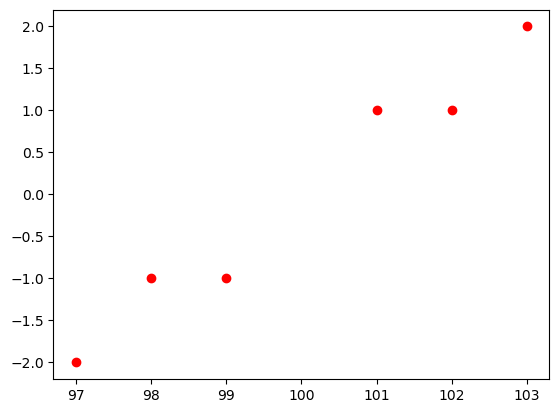

In [3]:
plt.plot(X[:,0], X[:,1], 'ro')


## Loading the PCA Algorithm


In [12]:
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [13]:
pca_2.fit(X)

PCA(n_components=2)

In [14]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance"). The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [15]:
X_transformed = pca_2.transform(X)

In [16]:
X_transformed

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

Think of column 1 as the coordinate along the first principal component (the first new axis) and column 2 as the coordinate along the second principal component (the second new axis).

You can probably just choose the first principal component since it retains 99% of the information (explained variance).

## Since the first component retains most of the info, lets just use one.

In [17]:
pca = PCA(n_components=1)
pca.fit(X)
pca.explained_variance_ratio_

X_transformed_final = pca.transform(X)

In [18]:
X_transformed_final

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

Notice how this column is just the first column of `X_transformed`.

If you had 2 features (two columns of data) and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [19]:
X_reduced = pca.inverse_transform(X_transformed_final)
X_reduced

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

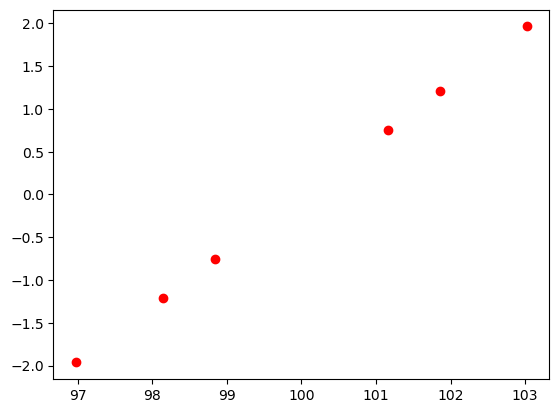

In [20]:
plt.plot(X_reduced[:,0], X_reduced[:,1], 'ro')

The `X_reduced` data is not identical to the original data X because PCA eliminates some variance (depending on how many components are retained).

### PCA in EDA

In [22]:
df = pd.read_csv('./datasets/toy_dataset.csv')
df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  27.422157 -29.662712 -23.297163 -15.161935   0.345581   3.706750   
1   3.489482 -19.153551 -14.636424  14.688258  20.114204  13.532852   
2   4.293509  22.691579  -1.045155  -8.740350  12.401082  31.362987   
3  -2.139348  23.158754 -26.241206  19.426465   9.472049   8.453948   
4 -35.251034  27.281816 -29.470282 -21.786865  11.806822  58.655133   

   feature_6  feature_7  feature_8  feature_9  ...  feature_990  feature_991  \
0  -5.507209 -46.992476   5.175469 -47.768145  ...     7.815960    24.320965   
1  34.298084  22.982509  37.938670 -35.648144  ...    11.145527   -38.886603   
2 -18.831206 -35.384557   8.161430 -16.421762  ...    48.190331    -0.503157   
3   0.637211 -26.675984 -43.823329  11.840874  ...   -51.613076    13.278858   
4   5.375230  59.740676 -49.007717 -21.801155  ...     0.010857    20.975655   

   feature_992  feature_993  feature_994  feature_995  feature_996  \
0   -33.987522    22.306088    31.173511    31.264830     8.380699   
1    44.579337    37.308519    29.560535   -10.643331    -6.499263   
2   -21.740678    15.972237     1.122335   -45.473538    10.518065   
3   -44.179281    32.912282     4.805774     3.960836   -15.888356   
4   -21.358371    18.709369    22.362477    41.214565    -7.217724   

   feature_997  feature_998  feature_999  
0   -25.843189    36.706408   -43.480792  
1    19.921666    -3.528982    31.068739  
2    -5.818320   -29.466301   -13.676685  
3    61.384773    33.112334     5.088320  
4    31.173870    37.097532   -27.509420  

[5 rows x 1000 columns]

### Pairwise analysis

In [23]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0,999)]
        y = df.columns[randint(0,999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,999)]
        tuples.append((x,y))
        i+=1
    return tuples

In [24]:
pairs = get_pairs()

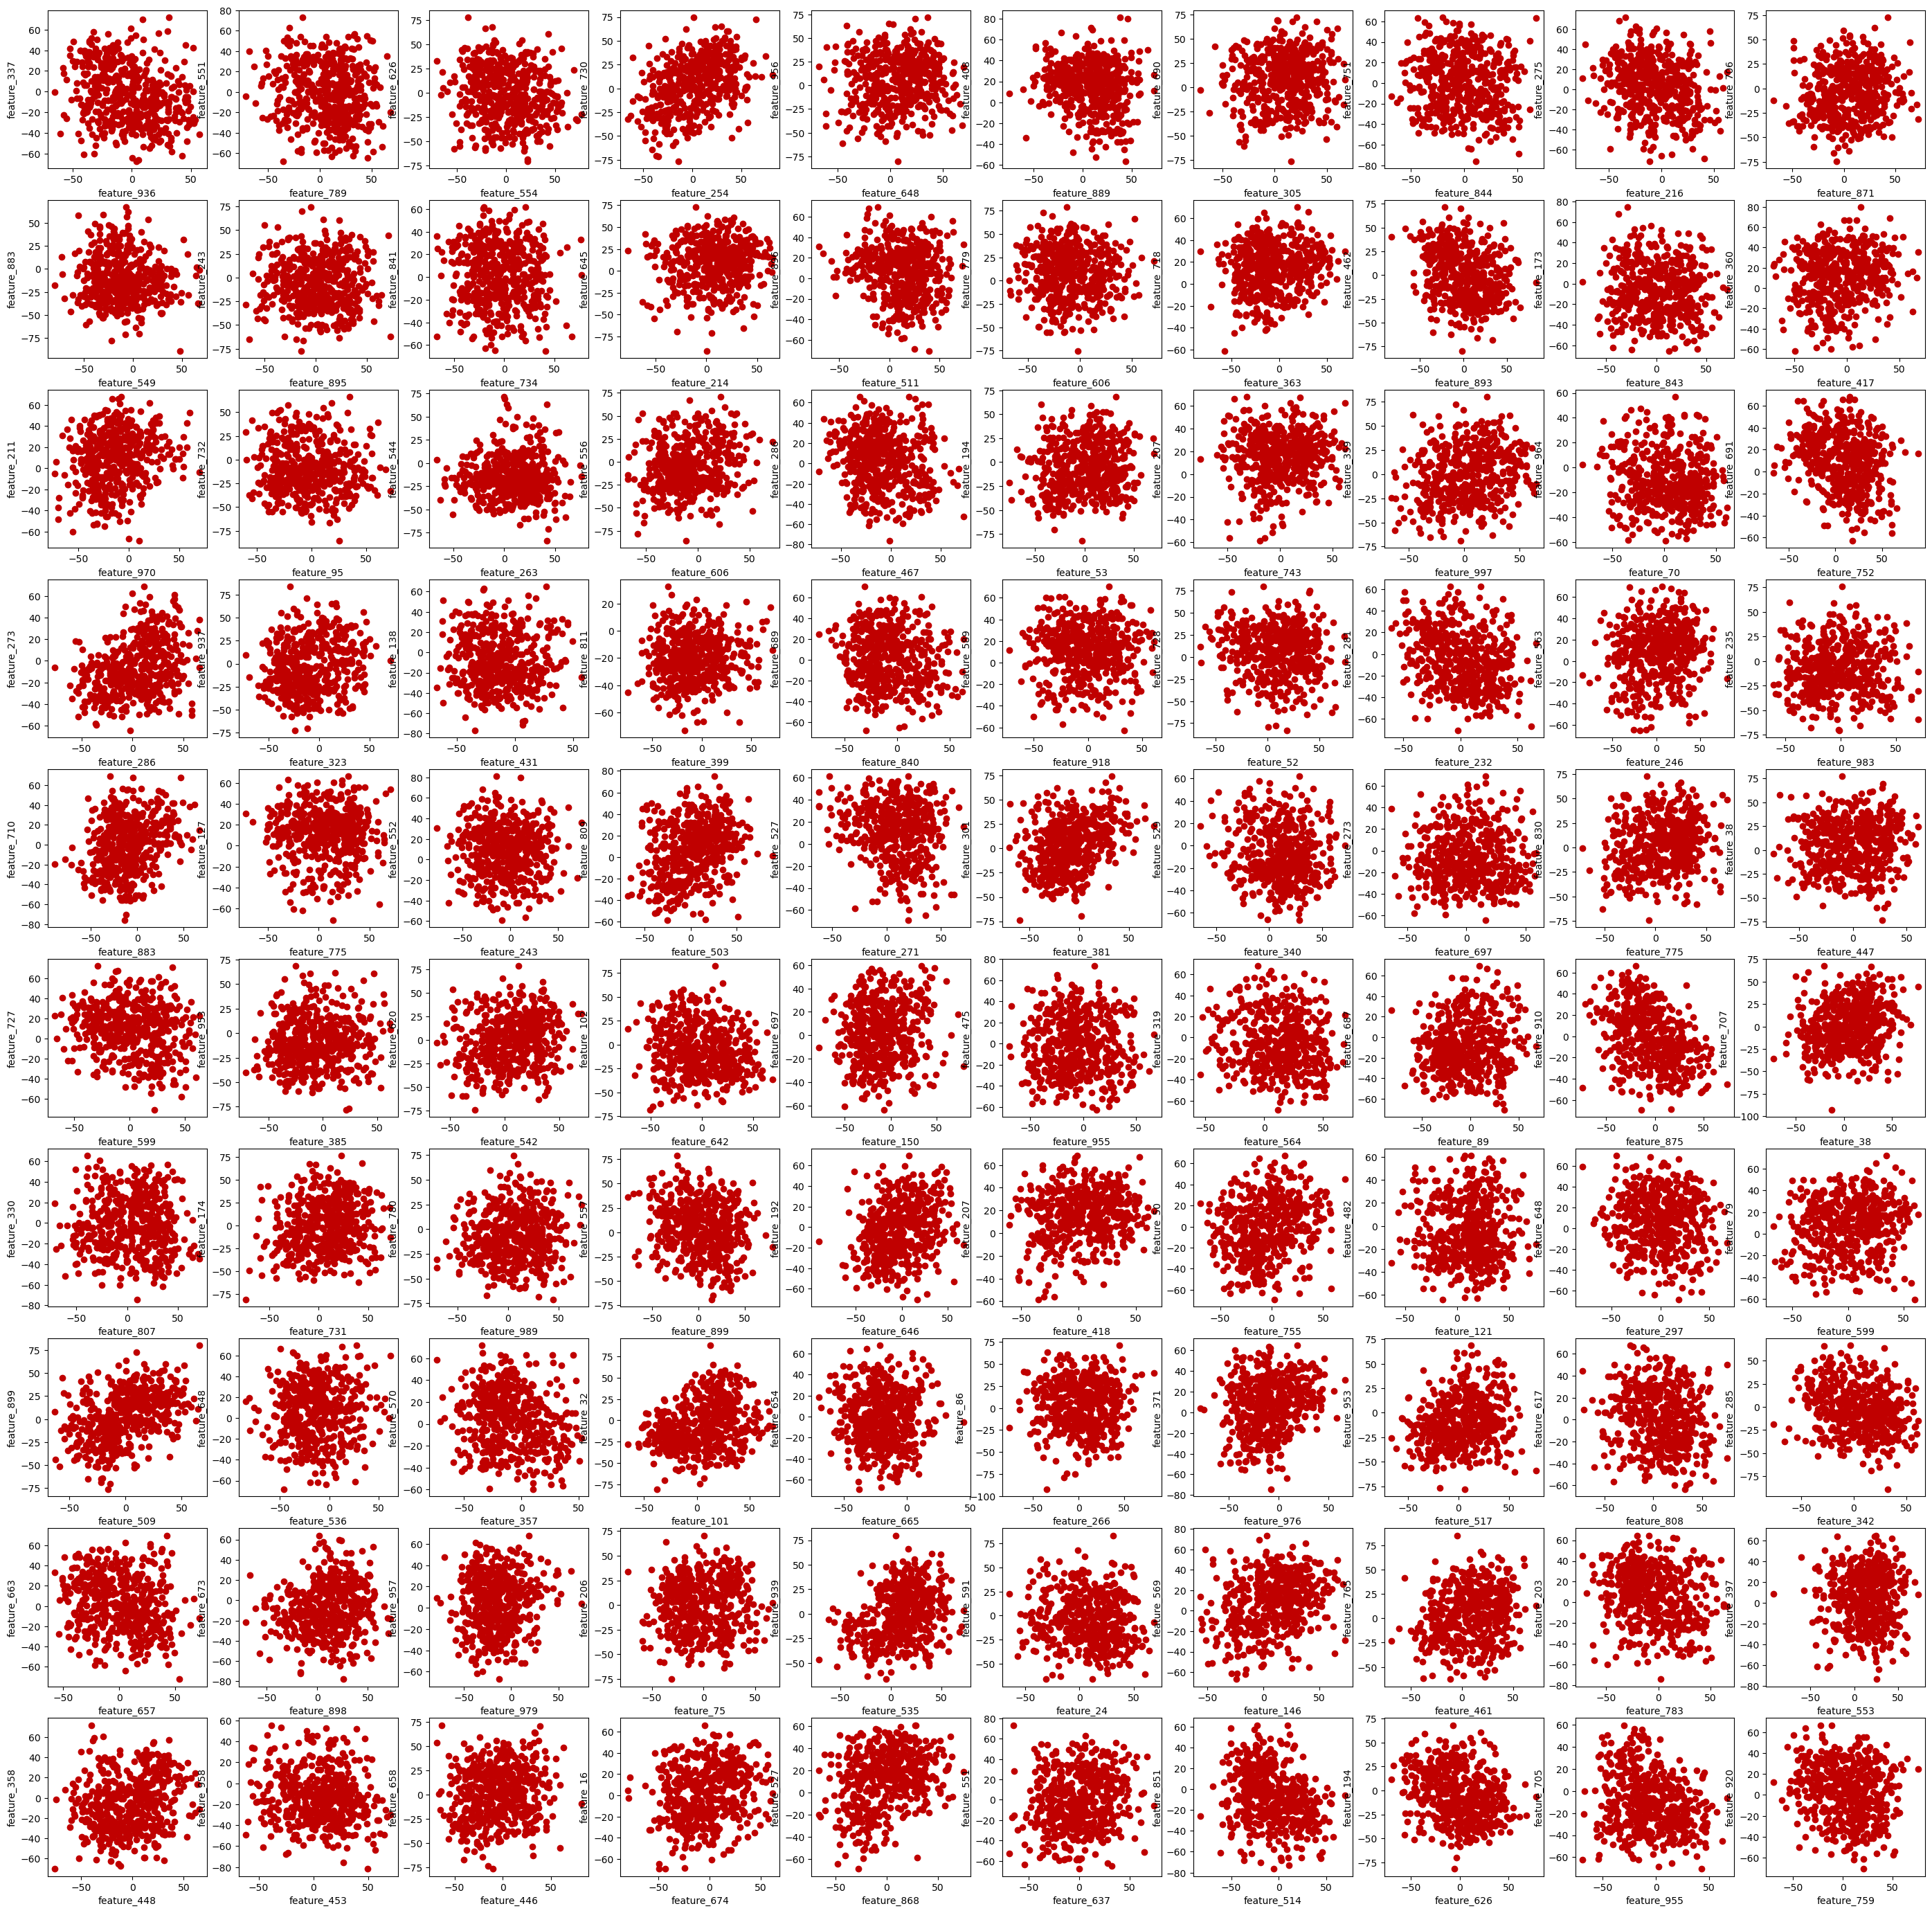

In [25]:
fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

It looks like there is not much information hidden in pairwise features. Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.


In [26]:
# This may take 1 minute to run
corr = df.corr()

In [31]:
corr

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000  -0.103722   0.015784  -0.033219  -0.415358  -0.266933   
feature_1    -0.103722   1.000000   0.337736  -0.171135   0.345884   0.185080   
feature_2     0.015784   0.337736   1.000000   0.013961   0.345145   0.299024   
feature_3    -0.033219  -0.171135   0.013961   1.000000   0.142227   0.183382   
feature_4    -0.415358   0.345884   0.345145   0.142227   1.000000   0.383280   
...                ...        ...        ...        ...        ...        ...   
feature_995   0.042612   0.018929   0.006617  -0.050576  -0.031877   0.002757   
feature_996   0.289716  -0.260189  -0.072219   0.199677  -0.233503   0.005054   
feature_997  -0.274962   0.235876   0.012333   0.040579   0.214242  -0.079437   
feature_998   0.027641  -0.210954  -0.229972  -0.014650  -0.199061   0.093945   
feature_999   0.049573   0.047979  -0.076818   0.171000   0.012381   0.052593   

             feature_6  feature_7  feature_8  feature_9  ...  feature_990  \
feature_0    -0.137141  -0.194403   0.162446  -0.083976  ...    -0.120494   
feature_1     0.208196  -0.044625  -0.079949  -0.001948  ...    -0.005403   
feature_2     0.039985  -0.100859  -0.038675  -0.154532  ...     0.209160   
feature_3     0.049378  -0.088616  -0.116847  -0.152066  ...    -0.040119   
feature_4     0.277062   0.180477  -0.096038  -0.016284  ...     0.220092   
...                ...        ...        ...        ...  ...          ...   
feature_995   0.131874  -0.085383  -0.005111   0.348188  ...     0.024636   
feature_996  -0.197800  -0.068711  -0.263666  -0.201586  ...    -0.265101   
feature_997   0.143915  -0.141962   0.029627   0.210807  ...     0.013300   
feature_998  -0.087634  -0.147473  -0.048616   0.280748  ...    -0.065135   
feature_999   0.192966   0.072101   0.252028  -0.161262  ...     0.041341   

             feature_991  feature_992  feature_993  feature_994  feature_995  \
feature_0       0.020968     0.078680    -0.033252     0.076851     0.042612   
feature_1       0.123397    -0.250359    -0.090698     0.044208     0.018929   
feature_2       0.232511    -0.061087    -0.135484    -0.111952     0.006617   
feature_3      -0.256840    -0.015278    -0.185727    -0.144647    -0.050576   
feature_4       0.101415    -0.006388    -0.115772    -0.004572    -0.031877   
...                  ...          ...          ...          ...          ...   
feature_995     0.300726    -0.111659    -0.174067     0.176845     1.000000   
feature_996     0.042686    -0.042798    -0.141298    -0.022569     0.007601   
feature_997    -0.059288    -0.125165    -0.183001     0.040979     0.108621   
feature_998     0.040369    -0.200637     0.140856    -0.071527     0.332544   
feature_999    -0.510034     0.071651     0.084861    -0.092606    -0.374151   

             feature_996  feature_997  feature_998  feature_999  
feature_0       0.289716    -0.274962     0.027641     0.049573  
feature_1      -0.260189     0.235876    -0.210954     0.047979  
feature_2      -0.072219     0.012333    -0.229972    -0.076818  
feature_3       0.199677     0.040579    -0.014650     0.171000  
feature_4      -0.233503     0.214242    -0.199061     0.012381  
...                  ...          ...          ...          ...  
feature_995     0.007601     0.108621     0.332544    -0.374151  
feature_996     1.000000    -0.297023     0.093343    -0.167742  
feature_997    -0.297023     1.000000    -0.085454    -0.056337  
feature_998     0.093343    -0.085454     1.000000    -0.126505  
feature_999    -0.167742    -0.056337    -0.126505     1.000000  

[1000 rows x 1000 columns]

In [29]:
mask = (abs(corr) > 0.5) & (abs(corr) != 1)

In [33]:
corr.where(mask).stack().sort_values()

feature_81   feature_657   -0.631294
feature_657  feature_81    -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_395  feature_985    0.632593
feature_985  feature_395    0.632593
Length: 1870, dtype: float64

The maximum and minimum correlation is around $0.631$ - $0.632$. This does not show too much as well. 

Let's try PCA decomposition to compress our data into a 2-dimensional subspace (plane) so we can plot it as scatter plot. 

In [34]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

In [35]:
df_pca.head()

principal_component_1  principal_component_2
0              46.235641              -1.672797
1             210.208758             -84.068249
2              26.352795            -127.895751
3             116.106804            -269.368256
4             110.183605            -279.657306

Text(0.5, 1.0, 'PCA decomposition')

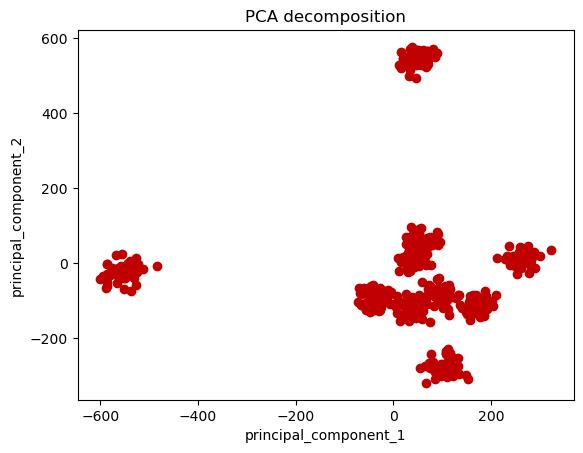

In [36]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [37]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
sum(pca.explained_variance_ratio_)

0.14572843555106305

Quite impressive! We can clearly see clusters in our data, something that we could not see before. How many clusters can you spot? 8, 10? 

If we run a PCA to plot 3 dimensions, we will get more information from data.


In [38]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [41]:
import plotly.express as px

In [42]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()